In [5]:
import numpy as np
import cv2
# from functions.full_focus import *
import glob2 as glob

### Load sample widefield images to test

In [10]:
# set image specs
dir_path = "/Users/nick/Dropbox (Cole Trapnell's Lab)/Nick/morphSeq/data/raw_keyence_data/20230531/W024/P00003/T0012/"


# load the z stack
# im_name = prefix + f'T{t:04}_' + well + f'_{tile:05}_' + 'Z*_' + 'CH' + str(channel) + '.tif'
im_list = sorted(glob.glob(dir_path + '*.tif'))

images = []
for i in range(len(im_list)):
    im = cv2.imread(im_list[i])
    images.append(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))


In [22]:
def doLap(image, lap_size=5, blur_size=5):

    # YOU SHOULD TUNE THESE VALUES TO SUIT YOUR NEEDS
#     kernel_size = 5  # Size of the laplacian window
#     blur_size = 5  # How big of a kernal to use for the gaussian blur
    # Generally, keeping these two values the same or very close works well
    # Also, odd numbers, please...

    blurred = cv2.GaussianBlur(image, (blur_size, blur_size), 0)
    return cv2.Laplacian(blurred, cv2.CV_64F, ksize=lap_size)


#
#   This routine finds the points of best focus in all images and produces a merged result...
#
# def focus_stack(images):
#     # print
#     # "Computing the laplacian of the blurred images"
#     laps = []
#     for i in range(len(images)):
#         # print
#         # "Lap {}".format(i)
#         laps.append(doLap(images[i]))

#     laps = np.asarray(laps)
#     # print
#     # "Shape of array of laplacians = {}".format(laps.shape)

#     output = np.zeros(shape=images[0].shape, dtype=images[0].dtype)

#     abs_laps = np.absolute(laps)
#     maxima = abs_laps.max(axis=0)
#     bool_mask = abs_laps == maxima
#     mask = bool_mask.astype(np.uint8)
#     for i in range(0, len(images)):
#         output = cv2.bitwise_not(images[i], output, mask=mask[i])

#     return 255 - output

In [45]:
lap_size=1
blur_size=1

laps = []
for i in range(len(images)):
    # print
    # "Lap {}".format(i)
    laps.append(doLap(images[i],  blur_size=blur_size, lap_size=lap_size))

laps = np.asarray(laps)
# print
# "Shape of array of laplacians = {}".format(laps.shape)

ff_image = np.zeros(shape=images[0].shape, dtype=images[0].dtype)

abs_laps = np.absolute(laps)
depth_image = np.argmax(abs_laps, axis=0)
maxima = abs_laps.max(axis=0)
bool_mask = abs_laps == maxima
mask = bool_mask.astype(np.uint8)
for i in range(len(images)):
    ff_image[np.where(mask[i]==1)] = images[i][np.where(mask[i]==1)]
#     depth_image[np.where(mask[i]==1)] = i

True

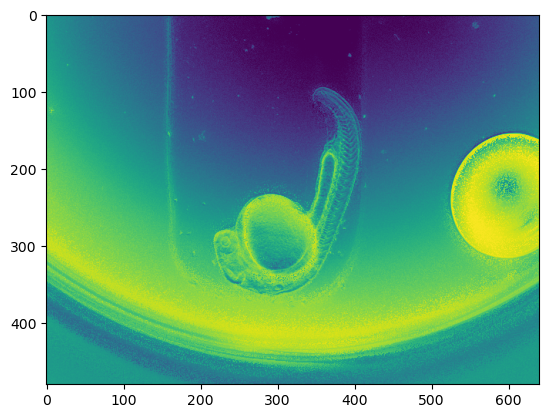

In [48]:
from matplotlib import pyplot as plt
# plt.imshow(depth_image)
plt.imshow(255-ff_image)
# plt.imshow(images[10])
# np.unique(ff_image)
cv2.imwrite('test_lap' + str(lap_size) + '_gauss' + str(blur_size) + '.tif', ff_image)

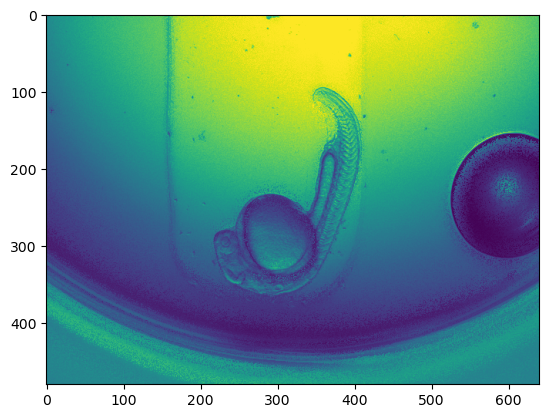

In [49]:
plt.imshow(ff_image)